In [1]:
# Importing the necessary tools for Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import io
%cd "C:\Mani-DS\Wine Quality"

C:\Mani-DS\Wine Quality


In [3]:
# loading the file
wine_quality=pd.read_csv("WineQT.csv")

In [4]:
#head() gives first 5 rows
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
#tail() gives last 5 rows
wine_quality.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [6]:
# shape gives us number of observations & variables 
wine_quality.shape

(1143, 13)

In [7]:
# info() method shows some of the characteristics of the data such as Column Name, No. of
#Dtype of the data, and Memory Usage.
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [8]:
# finding the null values
wine_quality.isnull().sum().sort_values(ascending=False)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

* No missing values

In [9]:
wine_quality=wine_quality.drop('Id',axis=1)

In [10]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
# Target Variable
wine_quality.quality.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

<AxesSubplot: xlabel='quality', ylabel='Count'>

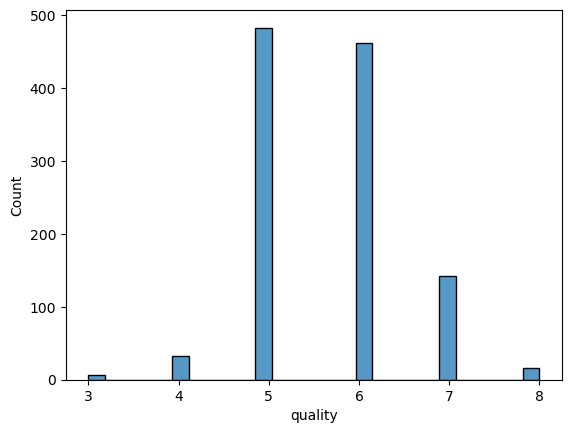

In [15]:
sns.histplot(data=wine_quality,x="quality")

Let us take wines with quality ≥ 6 are considered 'good wine' (good_quality = 1) and wines with quality < 6 are considered 'bad wine' (good_quality = 0).

In [16]:
wine_quality['good_quality'] = np.where(wine_quality['quality'] >= 6, 1, 0)
print(wine_quality['good_quality'].value_counts())

1    621
0    522
Name: good_quality, dtype: int64


Text(0.5, 1.0, 'Wine Quality Distribution')

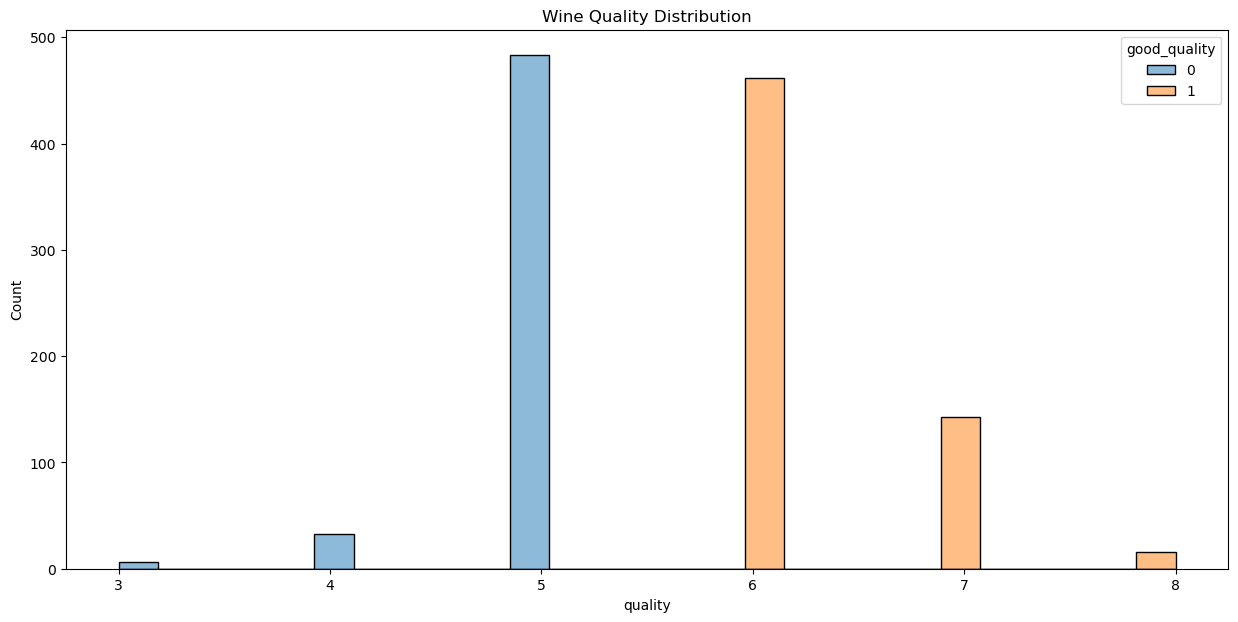

In [17]:
plt.figure(figsize=(15,7))
sns.histplot(data=wine_quality,x='quality',hue='good_quality')
plt.title("Wine Quality Distribution")

In [19]:
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,0.543307
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,0.498339
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


<AxesSubplot: xlabel='fixed acidity', ylabel='Count'>

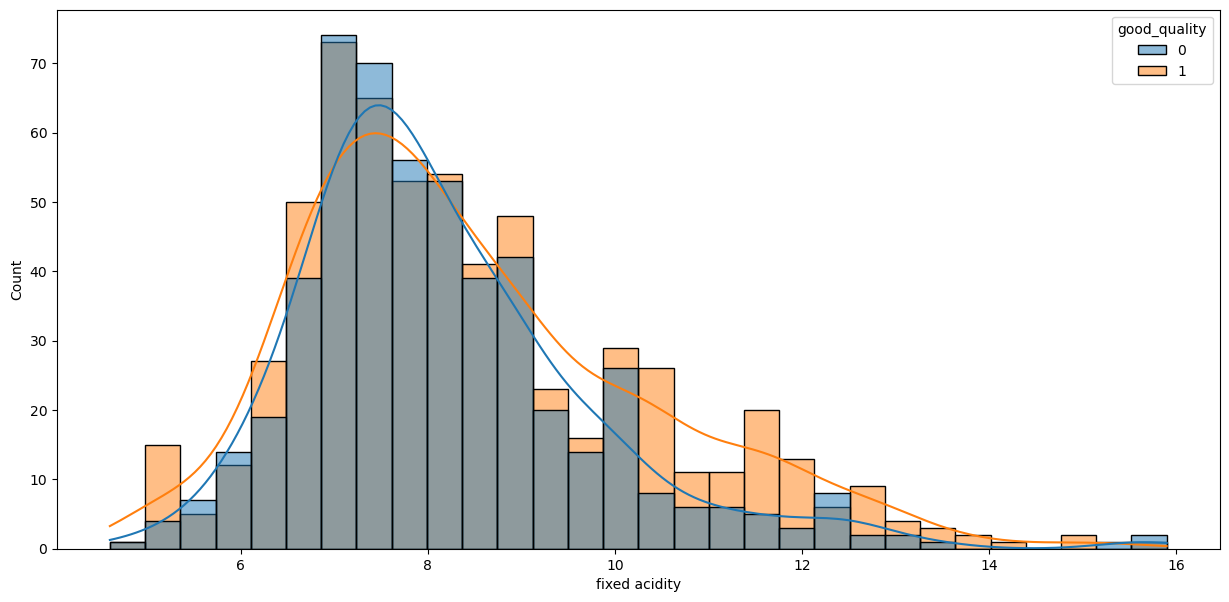

In [27]:
plt.figure(figsize=(15,7))
sns.histplot(x='fixed acidity',hue='good_quality',data=wine_quality,kde=True)

<AxesSubplot: xlabel='volatile acidity', ylabel='Count'>

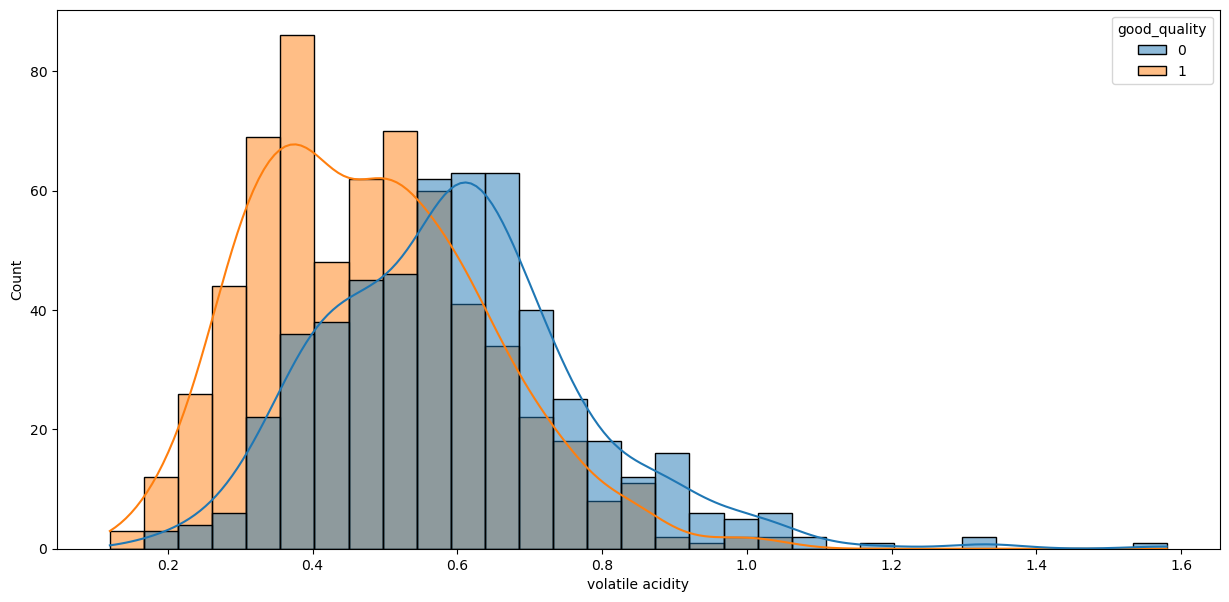

In [28]:
plt.figure(figsize=(15,7))
sns.histplot(x='volatile acidity',hue='good_quality',data=wine_quality,kde=True)

<AxesSubplot: xlabel='citric acid', ylabel='Count'>

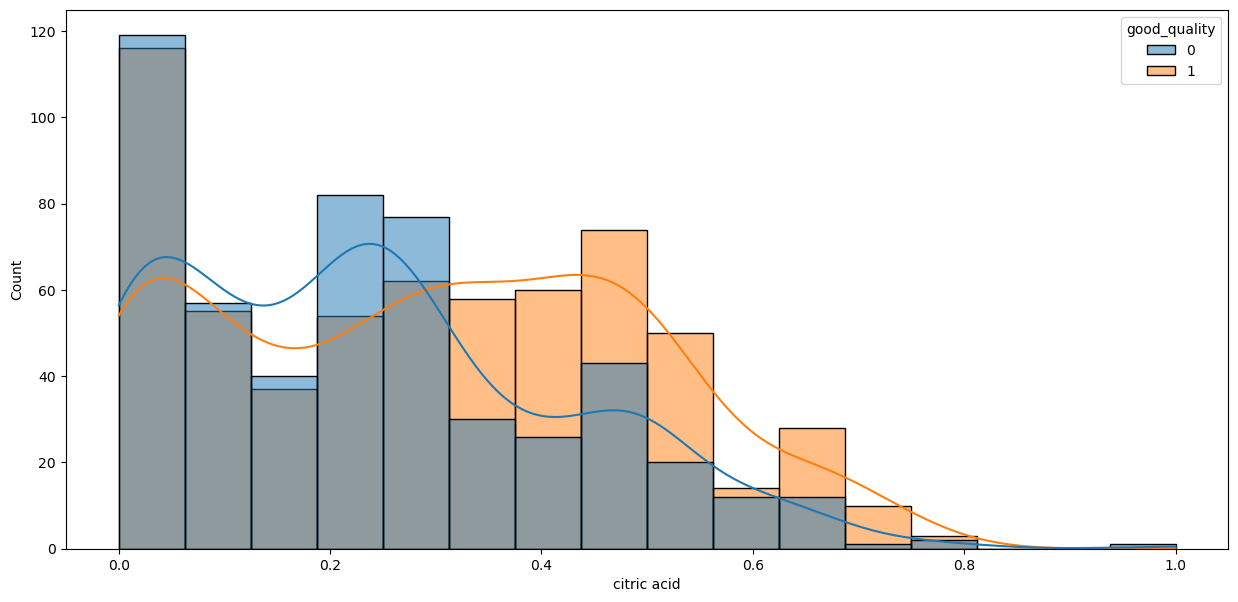

In [29]:
plt.figure(figsize=(15,7))
sns.histplot(x='citric acid',hue='good_quality',data=wine_quality,kde=True)

<AxesSubplot: xlabel='residual sugar', ylabel='Count'>

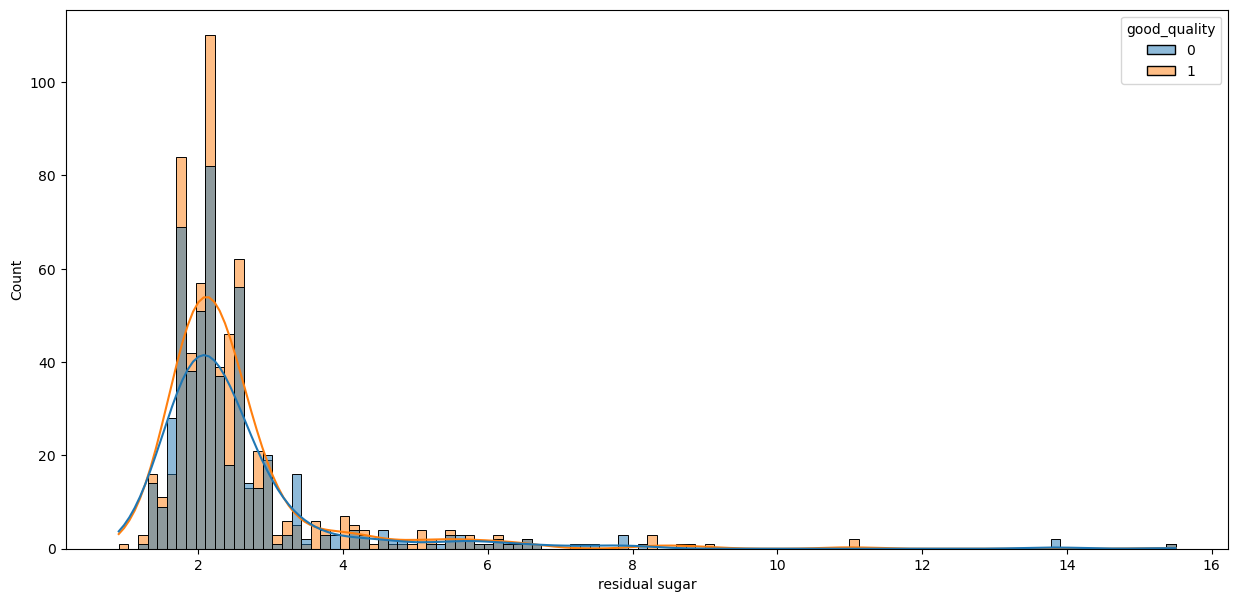

In [30]:
plt.figure(figsize=(15,7))
sns.histplot(x='residual sugar',hue='good_quality',data=wine_quality,kde=True)

<AxesSubplot: xlabel='chlorides', ylabel='Count'>

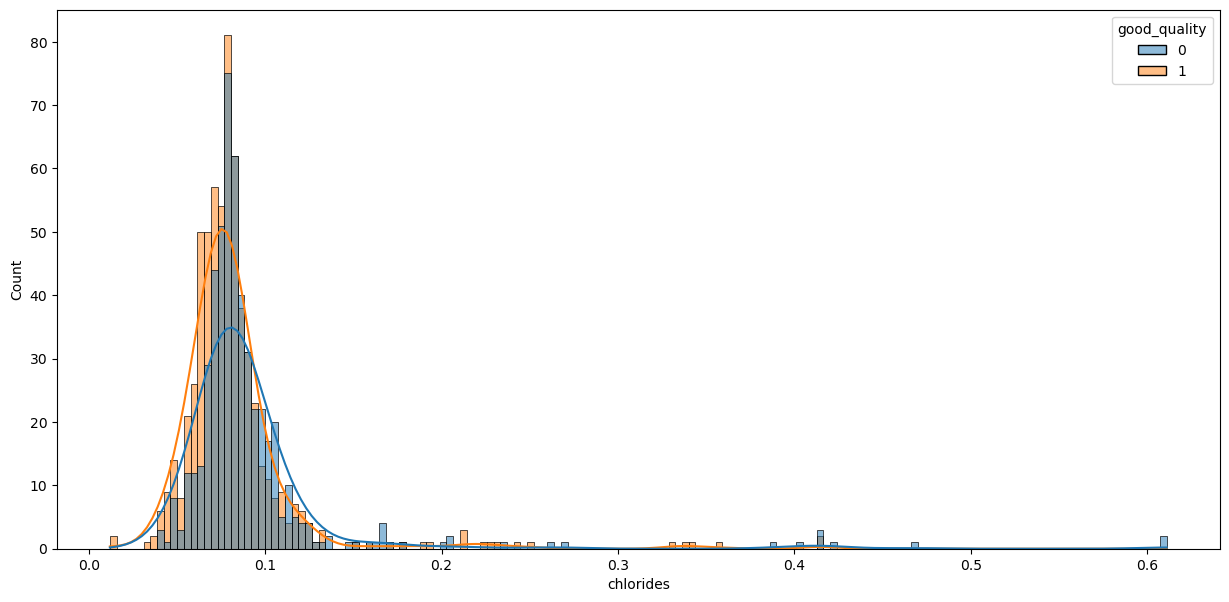

In [31]:
plt.figure(figsize=(15,7))
sns.histplot(x='chlorides',hue='good_quality',data=wine_quality,kde=True)

<AxesSubplot: xlabel='free sulfur dioxide', ylabel='Count'>

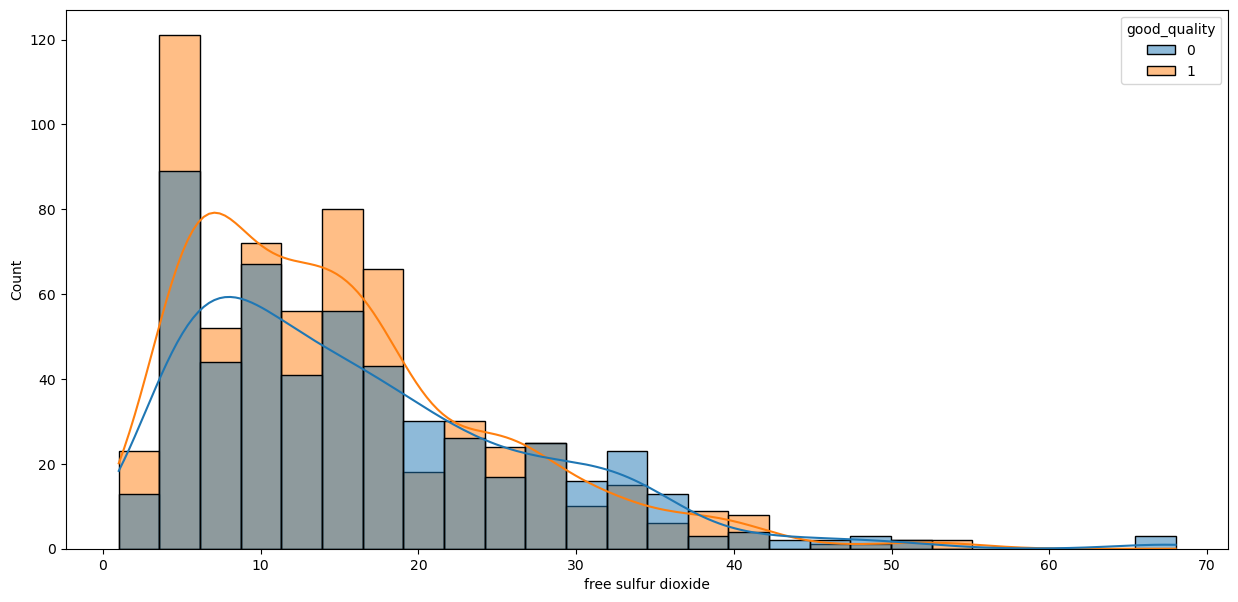

In [32]:
plt.figure(figsize=(15,7))
sns.histplot(x='free sulfur dioxide',hue='good_quality',data=wine_quality,kde=True)

<AxesSubplot: xlabel='total sulfur dioxide', ylabel='Count'>

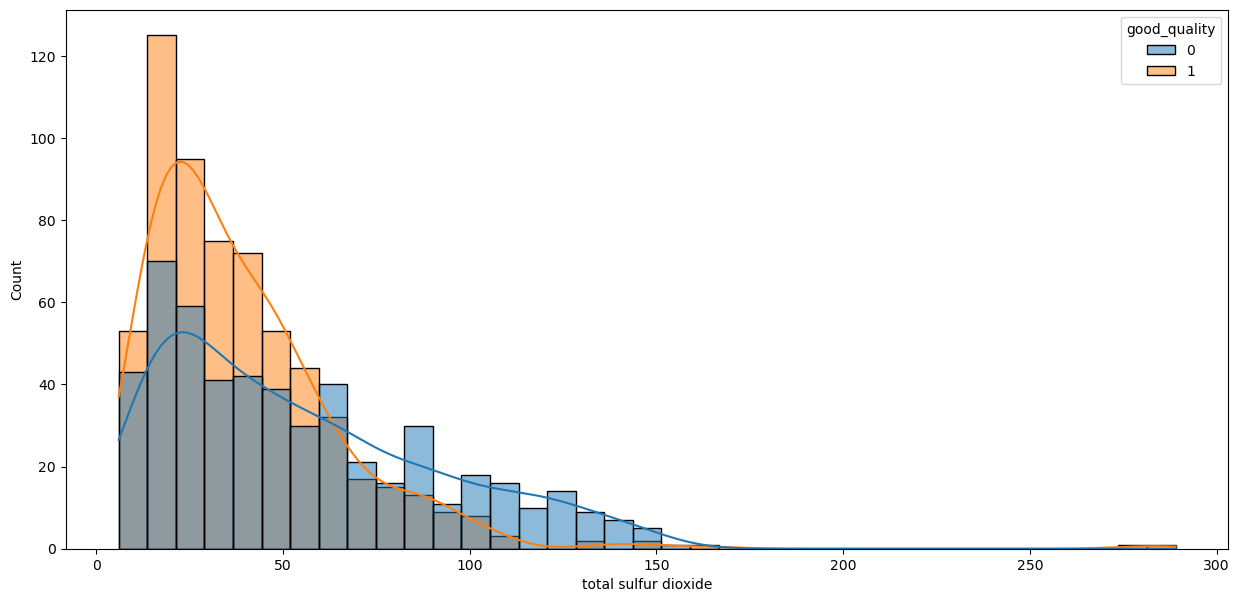

In [33]:
plt.figure(figsize=(15,7))
sns.histplot(x='total sulfur dioxide',hue='good_quality',data=wine_quality,kde=True)

<AxesSubplot: xlabel='density', ylabel='Count'>

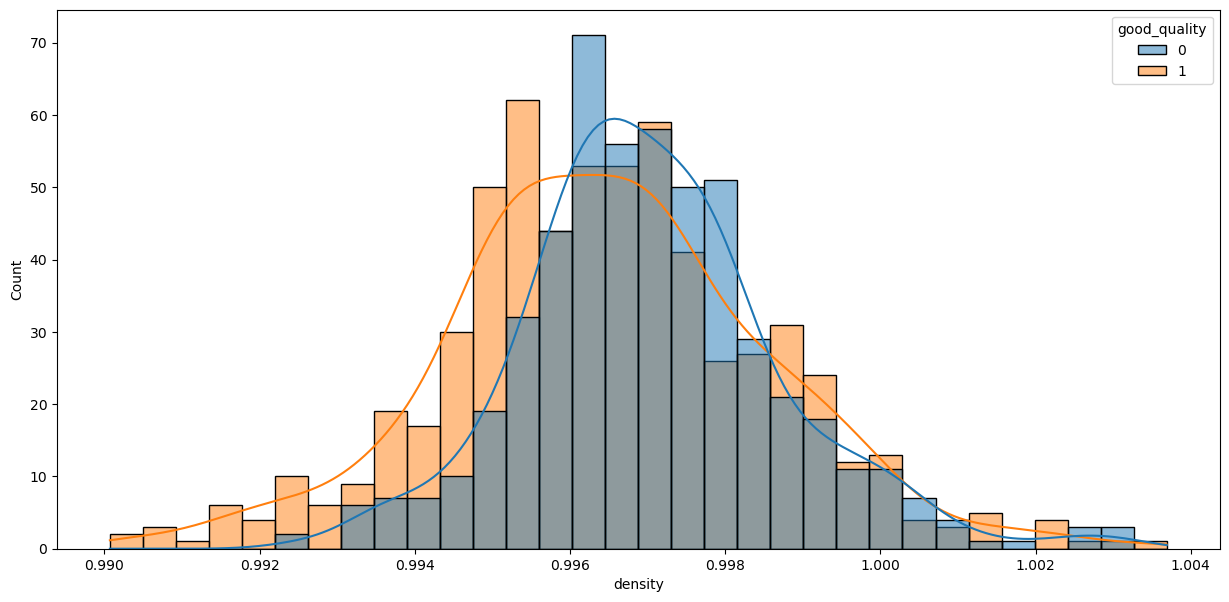

In [34]:
plt.figure(figsize=(15,7))
sns.histplot(x='density',hue='good_quality',data=wine_quality,kde=True)

<AxesSubplot: xlabel='sulphates', ylabel='Count'>

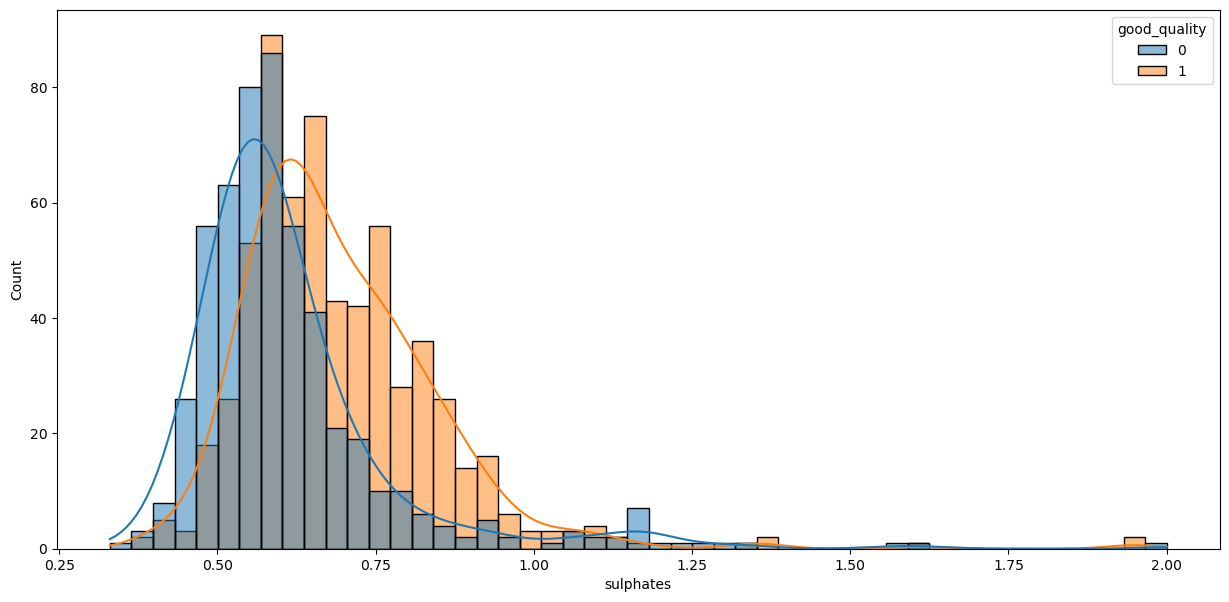

In [35]:
plt.figure(figsize=(15,7))
sns.histplot(x='sulphates',hue='good_quality',data=wine_quality,kde=True)

<AxesSubplot: xlabel='alcohol', ylabel='Count'>

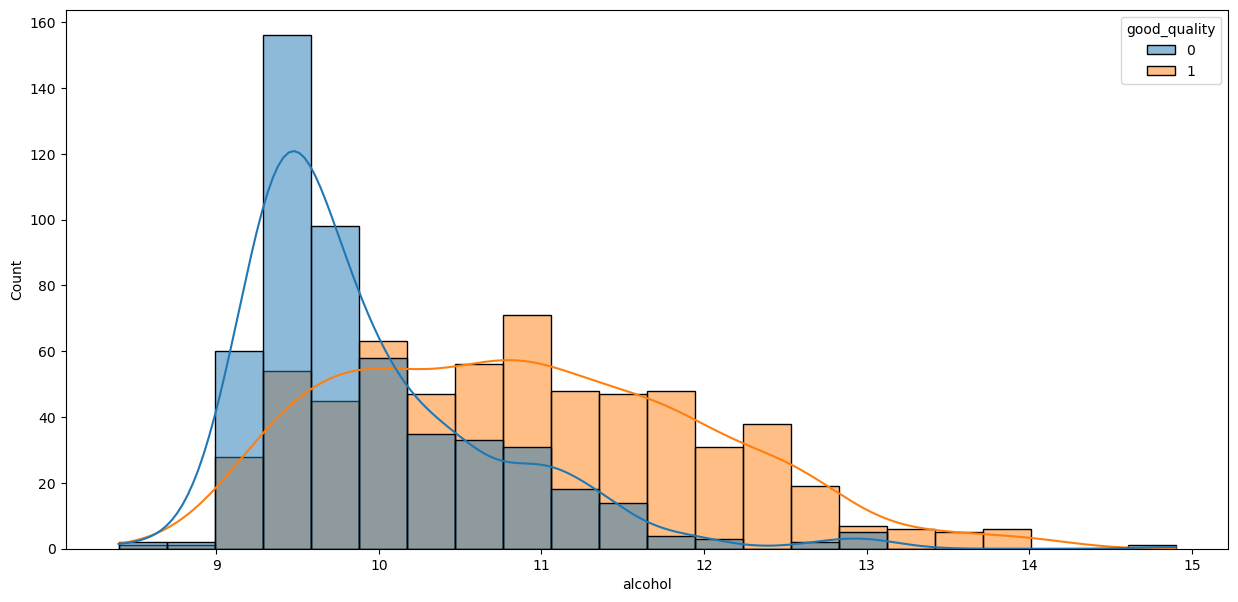

In [36]:
plt.figure(figsize=(15,7))
sns.histplot(x='alcohol',hue='good_quality',data=wine_quality,kde=True)

In [39]:
#split the data
y=wine_quality['quality']
x=wine_quality.drop('quality',axis=1)

In [40]:
#correlation matrix
x.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good_quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.088682
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.330787
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.155144
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,-0.007732
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.100601
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.070577
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.226680
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.154255
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,0.015251
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.234221


<AxesSubplot: >

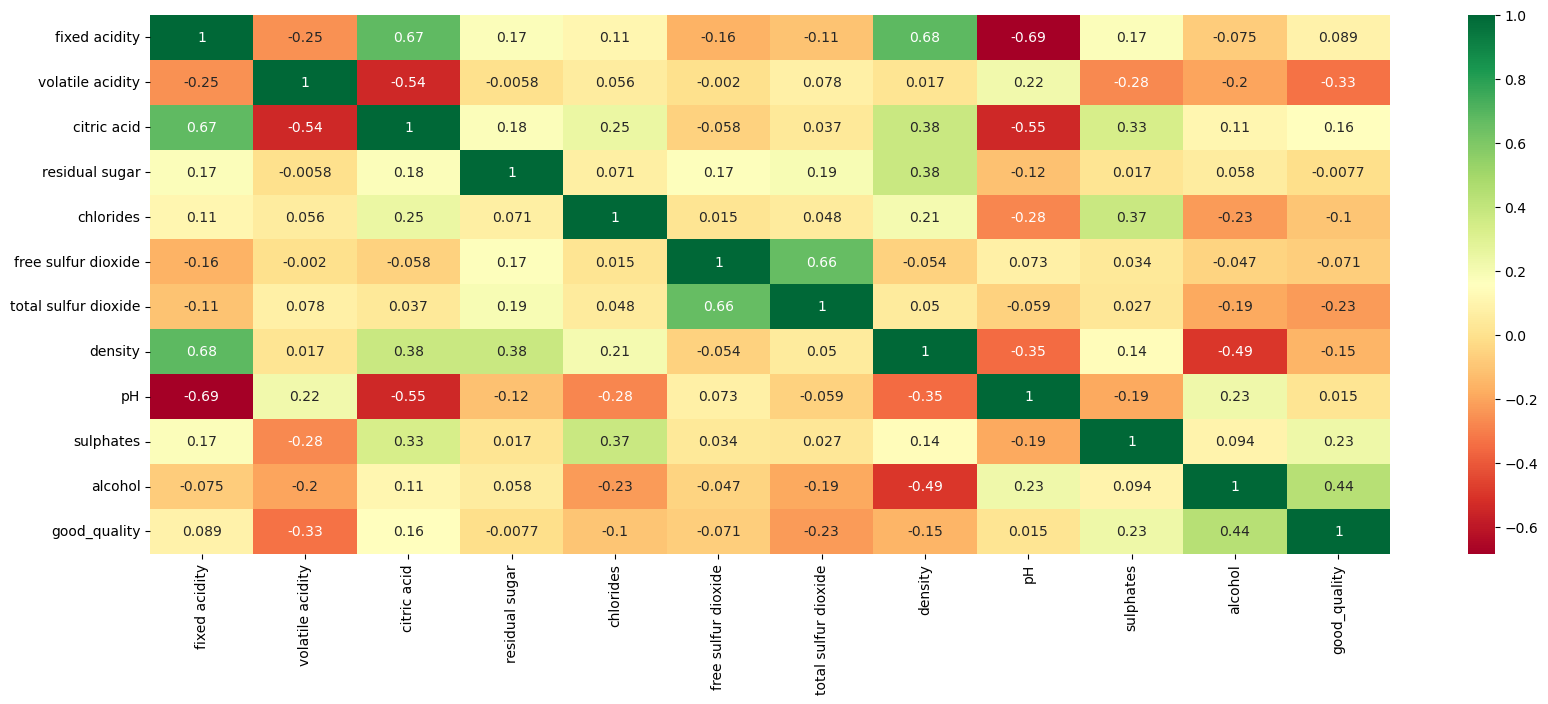

In [41]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(x.corr(), annot=True, cmap='RdYlGn')

In [49]:
y=wine_quality['quality'].apply(lambda y:1 if y>6 else 0) 

In [50]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [51]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [52]:
#from sklearn.preprocessing import StandardScaler

In [53]:
#scaler=StandardScaler()

In [56]:
#numericols_scaled=scaler.fit_transform(x)

In [58]:

#pd.DataFrame(numericols_scaled,columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
                                        'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','good_quality']).head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good_quality
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,-1.090713
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601,-1.090713
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601,-1.090713
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601,0.916831
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,-1.090713


In [59]:
# Normalizing
# list of numerical columns which require normalization
num_cols=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
        'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','good_quality']


# Importing required library from sklearn for normalization
from sklearn import preprocessing
feature_to_scale = num_cols

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x[feature_to_scale] = min_max_scaler.fit_transform(x[feature_to_scale])

In [60]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good_quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385,0.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385,0.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385,1.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0.0


In [61]:
from sklearn.model_selection import  train_test_split

#Spliting data into Training 80% and Test set 20%

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
logreg=LogisticRegression()

In [64]:
logregmodel=logreg.fit(X_train,y_train)

In [66]:
logregmodel.score(X_train,y_train)

0.8774617067833698

In [72]:
y_pred=logregmodel.predict(X_test)

In [73]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [74]:
accuracy_score(y_test,ypred)

0.8602620087336245

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       195
           1       0.57      0.24      0.33        34

    accuracy                           0.86       229
   macro avg       0.73      0.60      0.63       229
weighted avg       0.83      0.86      0.83       229



In [76]:
print(confusion_matrix(y_test,y_test))

[[195   0]
 [  0  34]]


In [77]:
(195+34)/(195+0+0+34)

1.0

In [78]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [79]:
tree=DecisionTreeClassifier()

In [80]:
treemodel=tree.fit(X_train,y_train)

In [81]:
y_pred=treemodel.predict(X_test)

In [82]:
accuracy_score(y_test,y_pred)

0.8777292576419214

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       195
           1       0.57      0.68      0.62        34

    accuracy                           0.88       229
   macro avg       0.76      0.79      0.77       229
weighted avg       0.89      0.88      0.88       229



In [84]:
print(confusion_matrix(y_test,y_pred))

[[178  17]
 [ 11  23]]


In [85]:
(178+23)/(178+17+11+23)

0.8777292576419214

In [86]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

In [87]:
RF=RandomForestClassifier(n_estimators=1000)

In [88]:
RFmodel=RF.fit(X_train,y_train)

In [89]:
y_pred=RFmodel.predict(X_test)

In [90]:
accuracy_score(y_test,y_pred)

0.9039301310043668

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       195
           1       0.70      0.62      0.66        34

    accuracy                           0.90       229
   macro avg       0.82      0.79      0.80       229
weighted avg       0.90      0.90      0.90       229



In [92]:
print(confusion_matrix(y_test,y_pred))

[[186   9]
 [ 13  21]]


In [93]:
(186+21)/(186+9+13+21)

0.9039301310043668

In [94]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
gbm=GradientBoostingClassifier(n_estimators=3000)

In [96]:
gbmmodel=gbm.fit(X_train,y_train)

In [97]:
y_pred=gbmmodel.predict(X_test)

In [98]:
accuracy_score(y_test,y_pred)

0.9170305676855895

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       195
           1       0.74      0.68      0.71        34

    accuracy                           0.92       229
   macro avg       0.84      0.82      0.83       229
weighted avg       0.91      0.92      0.92       229



In [100]:
print(confusion_matrix(y_test,y_pred))

[[187   8]
 [ 11  23]]


In [101]:
(187+23)/(187+8+11+23)

0.9170305676855895